In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.patches import Patch
import matplotlib.image as mpimg
from matplotlib import rcParams

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sigProfilerPlotting as sigPlt
import umap.umap_ as umap
import os
os.chdir("C:/Users/sande/PycharmProjects/MEP_data")

%matplotlib inline

sns.set(rc={'figure.figsize':(10.0,8.27)})

In [2]:
def SBS_feat():
    zou = pd.read_pickle("data/zou2021/zou_SBS_indel_DBS.pkl")
    features = zou.columns[0:96]
    return features

def indel_feat():
    indel_features = []
    for i in range(1, 84):
        indel_features.append(str(i))
    return indel_features

def DBS_feat():
    xls = pd.ExcelFile('data/zou2021/DBS_features.xlsx')
    DBS_feat = pd.read_excel(xls, 'Blad1', index_col= 0,header= None)
    DBS_features = DBS_feat.index.tolist()
    return DBS_features


zou = pd.read_pickle("data/zou2021/zou_SBS_indel_DBS.pkl")
zou

# print(SBS_feat())
# print(indel_feat())
# print(DBS_feat())

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,...,TT>AC,TT>AG,TT>CA,TT>CC,TT>CG,TT>GA,TT>GC,TT>GG,indel_count,DBS_count
ATM_148_s1,0.054152,0.003610,0.003610,0.014440,0.007220,0.000000,0.000000,0.003610,0.018051,0.007220,...,0,0,0,0,0,0,0,0,14,1
ATM_148_s2,0.054902,0.000000,0.007843,0.039216,0.003922,0.000000,0.000000,0.000000,0.031373,0.003922,...,0,0,0,0,0,0,0,0,9,0
ATM_16_s1,0.100000,0.002778,0.005556,0.027778,0.002778,0.000000,0.000000,0.008333,0.016667,0.000000,...,0,0,0,0,0,0,0,0,6,1
ATM_16_s2,0.062731,0.007380,0.000000,0.029520,0.007380,0.000000,0.003690,0.003690,0.014760,0.011070,...,0,0,0,0,0,0,0,0,19,0
ATP2B4_2_s3,0.069620,0.012658,0.000000,0.006329,0.000000,0.006329,0.000000,0.000000,0.037975,0.012658,...,0,0,0,0,0,0,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRN_56_s4,0.046392,0.005155,0.015464,0.015464,0.010309,0.005155,0.000000,0.000000,0.020619,0.005155,...,0,0,0,0,0,0,0,0,18,0
XRCC4_77_s1,0.037815,0.000000,0.004202,0.012605,0.012605,0.000000,0.004202,0.000000,0.033613,0.016807,...,0,0,0,0,0,0,0,0,11,1
XRCC4_77_s2,0.092166,0.004608,0.000000,0.018433,0.000000,0.004608,0.000000,0.004608,0.023041,0.004608,...,0,0,0,0,0,0,0,0,14,0
XRCC4_78_s1,0.071918,0.003425,0.000000,0.030822,0.003425,0.006849,0.003425,0.000000,0.020548,0.013699,...,0,0,0,0,0,0,0,0,17,0


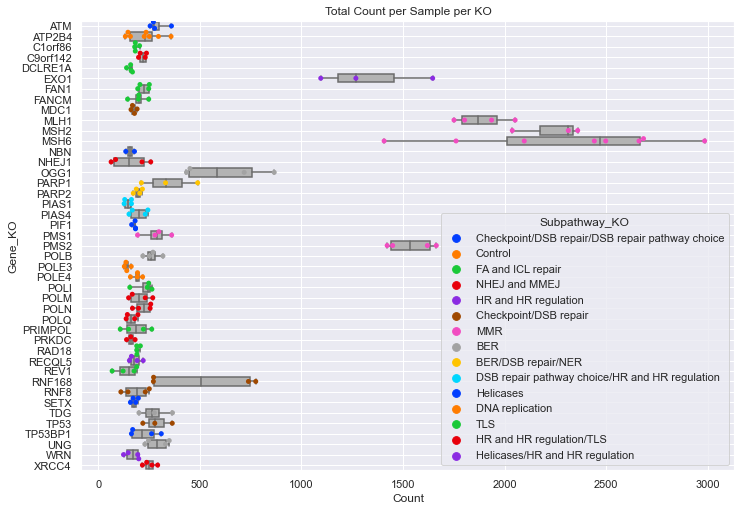

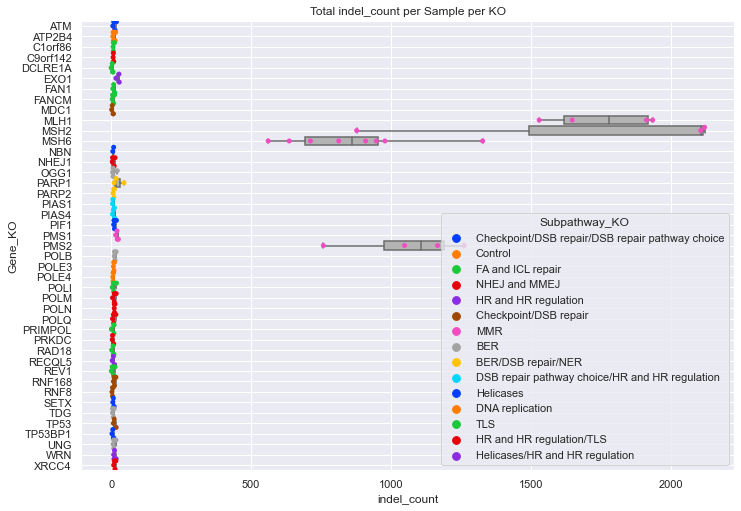

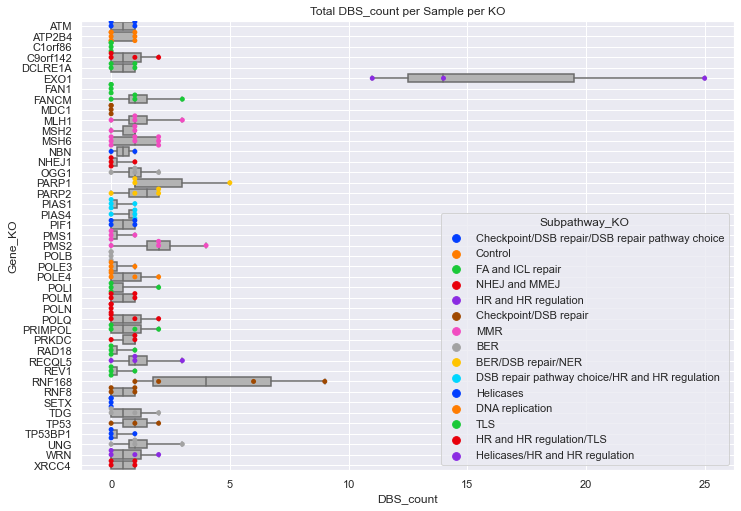

In [10]:
def count_perKO(zou, count_type):
    #count_type = 'Count', 'indel_count', 'DBS_count'
    sns.set_theme(style="whitegrid")
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    num_labels = len(set(zou.loc[:, ['Subpathway_KO']].values.flatten()))
    ax = sns.swarmplot(x = count_type, y = "Gene_KO", data = zou, hue = 'Subpathway_KO',palette=sns.color_palette("bright", num_labels),)
    ax = sns.boxplot(x = count_type, y = "Gene_KO", data = zou, whis = np.inf, color=".7")
    plt.gca().yaxis.grid(True)
    plt.gca().xaxis.grid(True)
    plt.title('Total {} per Sample per KO'.format(count_type))
#     plt.savefig('figures/EDA_zou/Histogram_{}.svg'.format(count_type))
    plt.show()
    
count_perKO(zou, 'Count')
count_perKO(zou, 'indel_count')
count_perKO(zou, 'DBS_count')



In [11]:
def filter_in(zou, pw, gen):
    '''
    zou = all data
    pw = list of pathway labels to be KEPT
    gen = list of gene labels to be KEPT
    '''
    # PATHWAY
    pathway = set(zou.loc[:, ['Subpathway_KO']].values.flatten()) 
    pathway.difference_update(pw)   
    zou_path = zou[~zou['Subpathway_KO'].isin(pathway)]
    
    # GENES
    genes = set(zou.loc[:, ['Gene_KO']].values.flatten()) 
    genes.difference_update(gen)    
    zou_gene = zou[~zou['Gene_KO'].isin(genes)] 
    zou_filtered = pd.concat([zou_gene,zou_path]).drop_duplicates()
    return zou_filtered
    
def filter_out(zou, pw, gen):
    '''
    zou = all data
    pw = list of pathway labels to be REMOVED
    gen = list of gene labels to be REMOVED
    '''
    # PATHWAY
    pathway = set(zou.loc[:, ['Subpathway_KO']].values.flatten()) 
    pathway.intersection_update(pw)    
    zou = zou[~zou['Subpathway_KO'].isin(pathway)] 
    
    # GENES
    genes = set(zou.loc[:, ['Gene_KO']].values.flatten()) 
    genes.intersection_update(gen)    
    zou = zou[~zou['Gene_KO'].isin(genes)] 
    return zou

In [50]:
def screeplot(pca,title):
    var = pca.explained_variance_ratio_
    cumsum = np.cumsum(var)
    plt.plot(np.arange(pca.n_components)+1, var, 'ro-')
    plt.plot(np.arange(var.size) + 1, cumsum)
    plt.title('Scree Plot')
    plt.xlabel('PC')
    plt.ylabel('Proportion of Variance explained')
    plt.show()
#     plt.savefig('plots/multi/_{0}_screeplot_{}.png'.format(pca.n_components))

def EDA_PCA(zou, n_comp, title):
    
    #
    if title[1] == 'SBS':
        features = SBS_feat()
    elif title[1] == 'Indel':
        features = indel_feat()
    elif title[1] == 'DBS':
        features = DBS_feat
    elif title[1] == 'SBS+Indel':
#         SBS_feat().type
#         indel_feat().type
        features = [*SBS_feat(), *indel_feat()]
        
    
    x = zou.loc[:,features].values  # Separating out the target
    x = StandardScaler().fit_transform(x)
    
    pca = PCA(n_components=n_comp)
    pc = pca.fit_transform(x)
    principal_df = pd.DataFrame(data= pc, columns= np.arange(n_comp)+1)
    final_df = pd.concat([principal_df, zou[['Gene_KO','Subpathway_KO','Count']].reset_index(drop=True)], axis =1)

    plt.figure(figsize=(12,8))

    num_labels = len(set(zou.loc[:, ['Subpathway_KO']].values.flatten()))
    
    sns.scatterplot(
        x= 1 , y= 2,
        hue="Subpathway_KO",
        size = "Count",
        sizes=(50,500),
        palette=sns.color_palette("bright", num_labels),
        data=final_df,
        alpha=0.9,
        legend ='auto'
    )
    
    plt.title('PCA - {0} - {1} - {2} - {3}'.format(*title))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
#     plt.savefig('figures/EDA_zou/PCA_{0}_{1}_{2}_{3}.svg'.format(*title),bbox_inches='tight')

    plt.show()

    screeplot(pca, title)  
#     print(final_df)
    
    
def EDA_UMAP(zou, n_comp, title, metric='euclidean', n_neighbors= 15):
    '''
    UMAP settings:
    n_neighbors : 15 (default)
        local (low value) vs global (high value) structure
    min_dist : 0.1 (default)
        minimum distance between points in low dim
    n_components : 2
        number of dimensions
    metric : 'cosine'
    '''
    if title[1] == 'SBS':
        features = SBS_feat()
    elif title[1] == 'Indel':
        features = indel_feat()
    elif title[1] == 'DBS':
        features = DBS_feat
    elif title[1] == 'SBS+Indel':
#         SBS_feat().type
#         indel_feat().type
        features = [*SBS_feat(), *indel_feat()]
        
    x = zou.loc[:,features].values  # Separating out the target
    x = StandardScaler().fit_transform(x)

    reducer = umap.UMAP(random_state=42, n_components=n_comp, metric=metric, n_neighbors = n_neighbors)
    embedding = reducer.fit_transform(x)

    final_df = pd.DataFrame(data=embedding, columns=np.arange(n_comp) + 1)
    final_df = pd.concat([final_df, zou[['Gene_KO','Subpathway_KO','Count']].reset_index(drop=True)], axis =1)
    
    plt.figure(figsize=(12,8))
    
    num_labels = len(set(zou.loc[:, ['Subpathway_KO']].values.flatten()))
    
    sns.scatterplot(
        x= 1 , y= 2,
        hue="Subpathway_KO",
        size = "Count",
        sizes=(50,500),
        palette=sns.color_palette("bright", num_labels),
        data=final_df,
        alpha=0.9,
        legend ='auto'
    )
    
    plt.title('UMAP - {0} - {1} - {2} - {3}'.format(*title))
    plt.xlabel('axis 1')
    plt.ylabel('axis 2')
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#     plt.savefig('figures/EDA_zou/UMAP_{0}_{1}_{2}_{3}_3n_cosine.svg'.format(*title),bbox_inches='tight')

    plt.show()

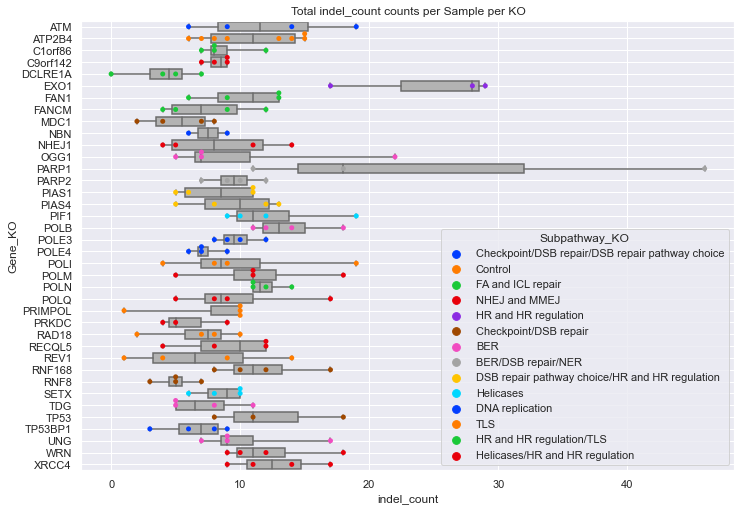

In [77]:
# INDELS filtered out MMR
zou = pd.read_pickle("data/zou2021/zou_SBS_indel_DBS.pkl")

pw = ['MMR']
gen = []

zou_filtered_out = filter_out(zou, pw, gen)

# count_perKO(zou, 'Count')
count_perKO(zou_filtered_out, 'indel_count')
# count_perKO(zou, 'DBS_count')

(172, 187)


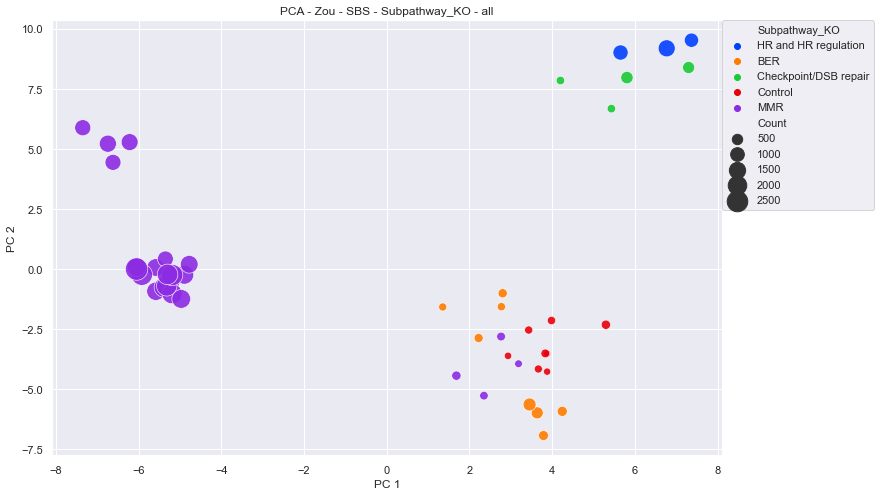

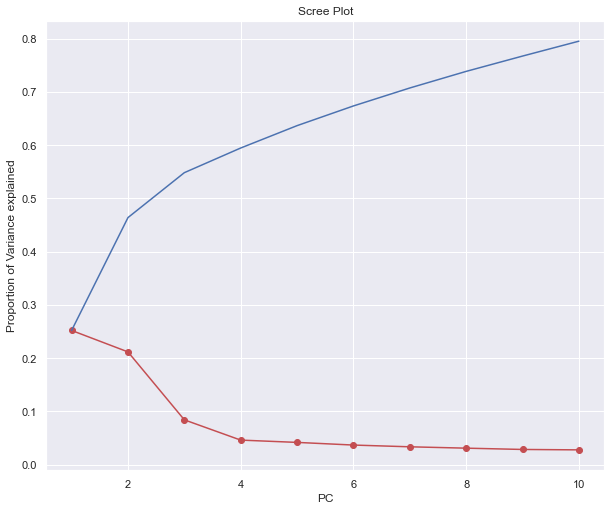

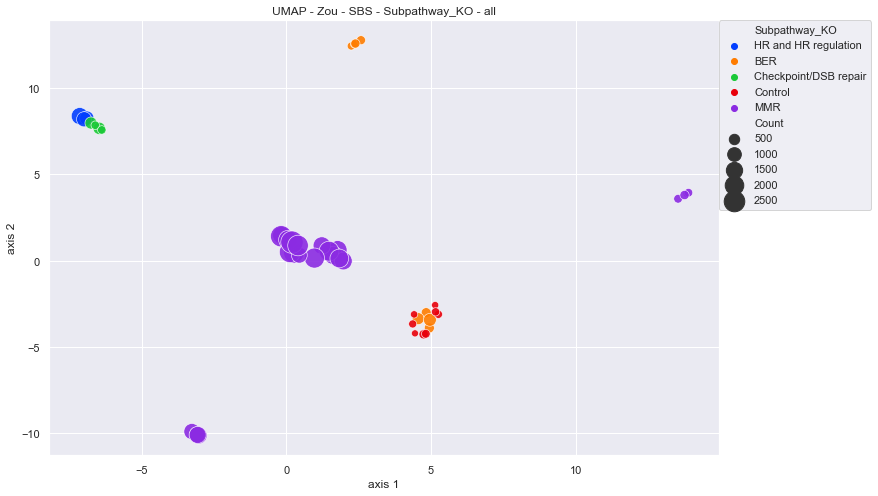

In [51]:
zou = pd.read_pickle("data/zou2021/zou_96SBS_83indel.pkl")
zou = zou[~(zou['indel_count'] < 0)]
print(zou.shape)

# pw = ['MMR']
# gen = []
# zou_filtered = filter_out(zou, pw, gen)

pw = ['Control','MMR']
gen = ['EXO1', 'RNF168', 'OGG1','UNG']
zou_filtered = filter_in(zou, pw, gen)

title = ['Zou','SBS' ,'Subpathway_KO', 'all']


EDA_PCA(zou_filtered, 10, title)
# EDA_UMAP(zou_filtered, 2, title, n_neighbors = 3)
EDA_UMAP(zou_filtered, 2, title, metric='cosine', n_neighbors = 3)


(172, 187)
(172, 187)


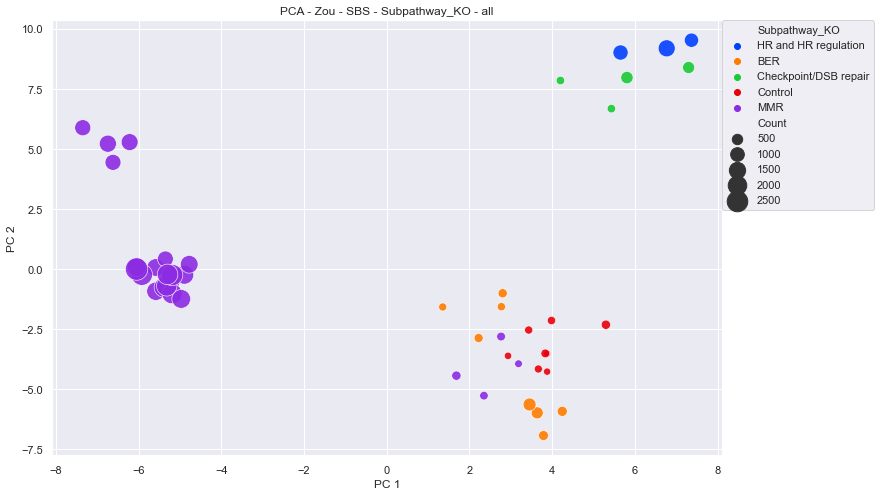

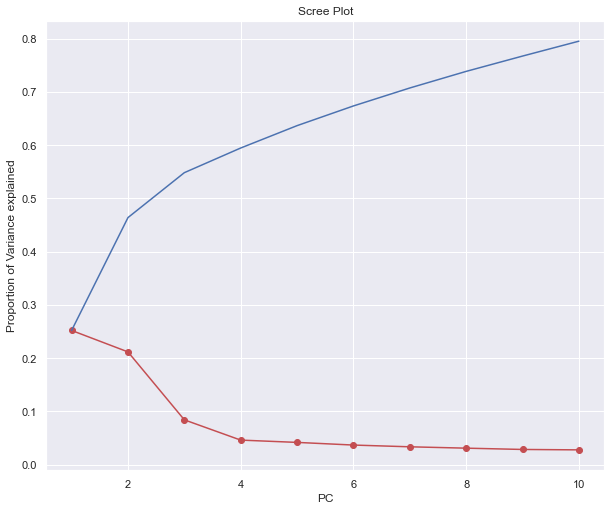

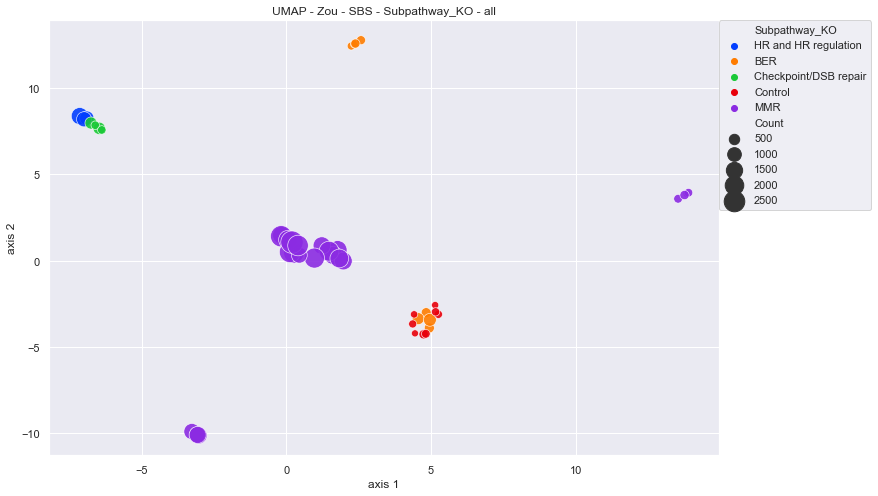

In [63]:
zou = pd.read_pickle("data/zou2021/zou_96SBS_83indel.pkl")
print(zou.shape)
zou = zou[~(zou['indel_count'] < 0)]
print(zou.shape)

# pw = ['MMR']
# gen = []
# zou_filtered = filter_out(zou, pw, gen)

pw = ['Control','MMR']
gen = ['EXO1', 'RNF168', 'OGG1','UNG']
zou_filtered = filter_in(zou, pw, gen)

title = ['Zou','SBS' ,'Subpathway_KO', 'all']

# zou_filtered = zou_filtered.sort_values(by=['Subpathway_KO'])

EDA_PCA(zou_filtered, 10, title)
# EDA_UMAP(zou_filtered, 2, title, n_neighbors = 3)
EDA_UMAP(zou_filtered, 2, title, metric='cosine', n_neighbors = 3)

(172, 187)
(145, 187)


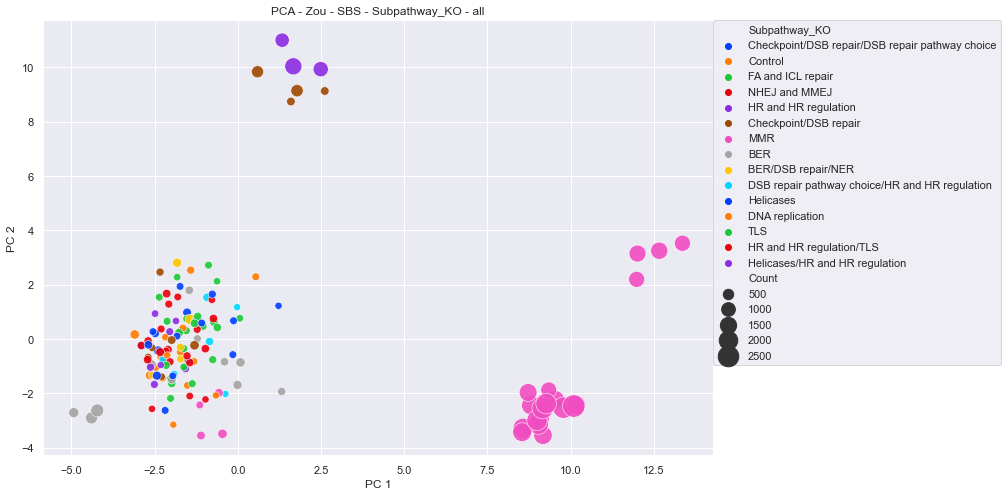

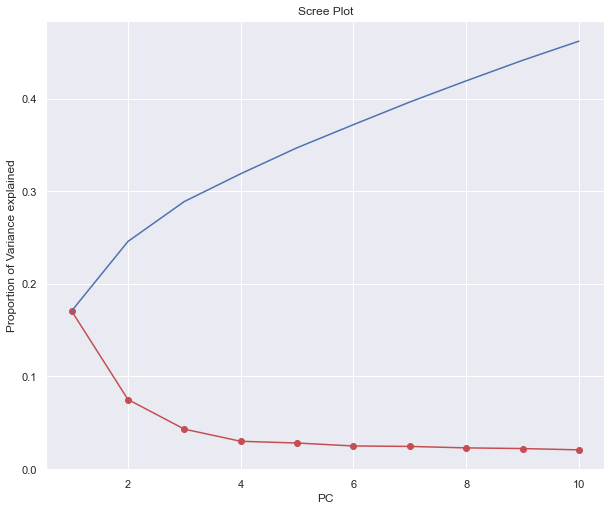

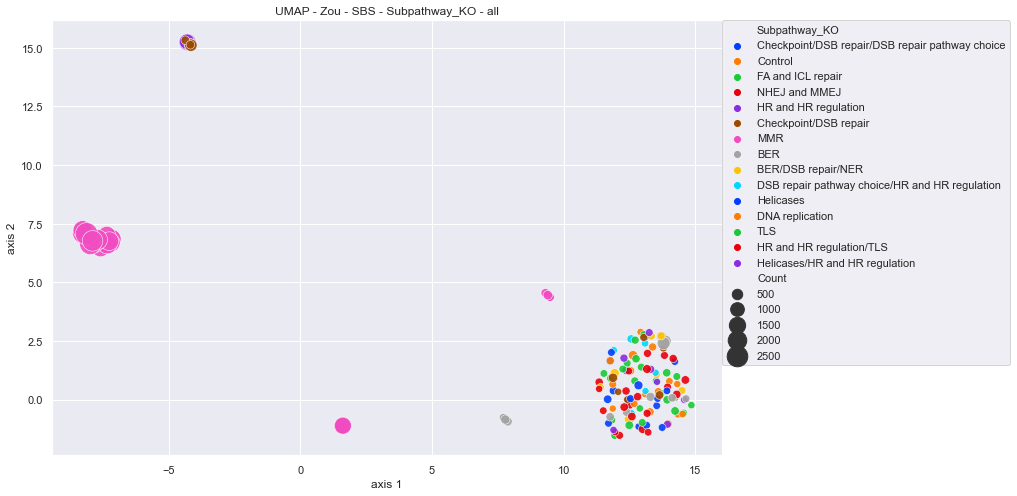

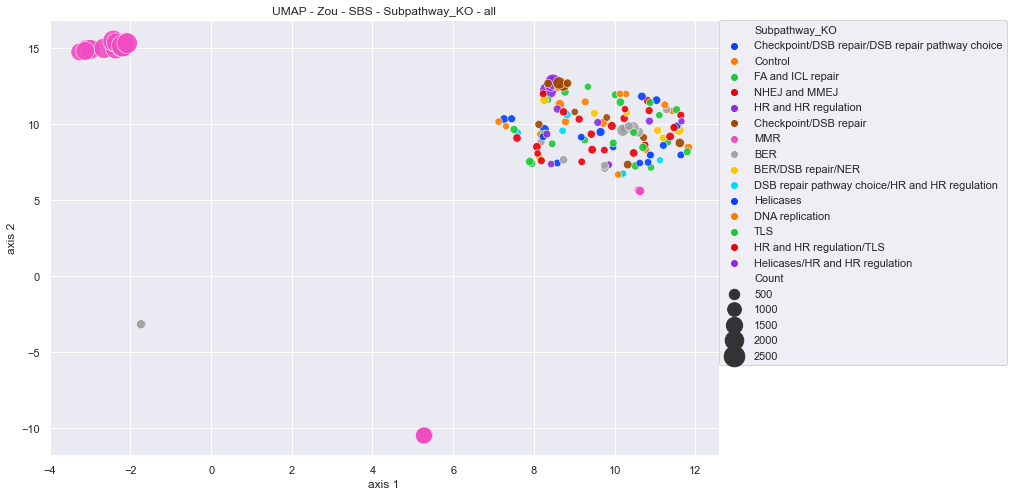

In [60]:
zou = pd.read_pickle("data/zou2021/zou_96SBS_83indel.pkl")
print(zou.shape)
zou = zou[~(zou['indel_count'] <= 5)]
print(zou.shape)

pw = []
gen = []
zou_filtered = filter_out(zou, pw, gen)

# pw = ['Control']
# gen = ['PARP1','EXO1', 'RNF168', 'OGG1','UNG']
# zou_filtered = filter_in(zou, pw, gen)

# title = ['Zou','SBS+Indel' ,'Subpathway_KO', 'all']

# EDA_PCA(zou_filtered, 10, title)
# # EDA_UMAP(zou_filtered, 2, title, n_neighbors = 3)
# EDA_UMAP(zou_filtered, 2, title, metric='cosine', n_neighbors = 3)


title = ['Zou','SBS' ,'Subpathway_KO', 'all']

EDA_PCA(zou_filtered, 10, title)
EDA_UMAP(zou_filtered, 2, title, n_neighbors = 4)
EDA_UMAP(zou_filtered, 2, title, metric='cosine', n_neighbors = 4)

(46, 185)


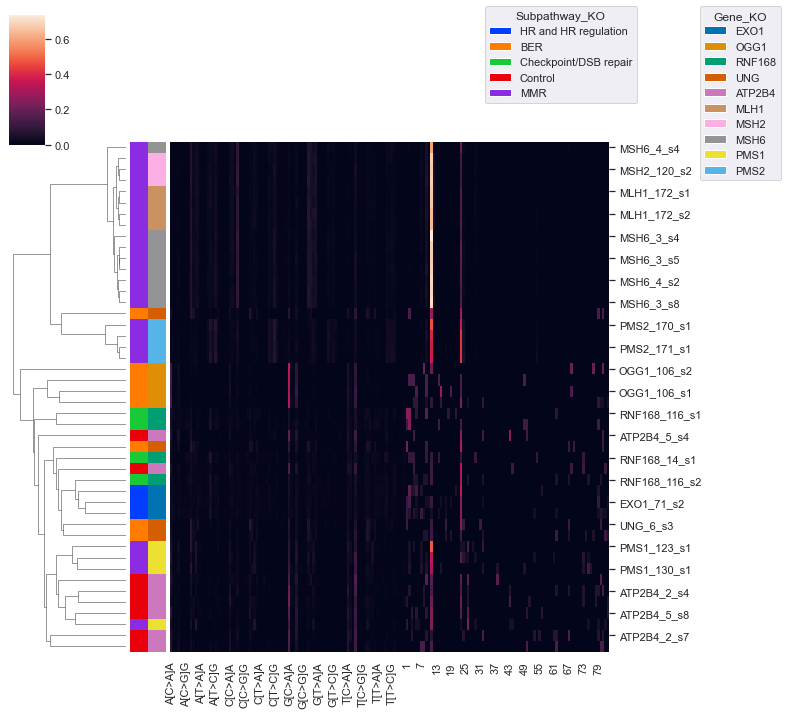

In [72]:
# CLUSTERMAP
zou = pd.read_pickle("data/zou2021/zou_96SBS_83indel.pkl")

# FILTER IN (which kept)
pw = ['Control','MMR']
# gen = []
gen = ['EXO1', 'RNF168','OGG1','UNG']
#ALL:
# gen = set(zou.loc[:, ['Gene_KO']].values.flatten())

zou_filtered_in = filter_in(zou, pw, gen)
# zou_filtered_in = zou

print(zou_filtered_in.shape)

# features = zou_filtered_in.columns[0:96]
# features = indel_feat()
features = [*SBS_feat(), *indel_feat()]

pathways = zou_filtered_in.pop("Subpathway_KO")
lut = dict(zip(pathways.unique(), sns.color_palette("bright", len(pathways.unique())) ))
color_path = pathways.map(lut)

gene = zou_filtered_in.pop("Gene_KO")
lut2 = dict(zip(gene.unique(), sns.color_palette("colorblind", len(gene.unique())) ))
color_gene = gene.map(lut2)


sns.clustermap(zou_filtered_in.loc[:,features],
               row_cluster= True,
               col_cluster = False,
               row_colors = [color_path, color_gene],
              )

handles = [Patch(facecolor=lut[name]) for name in lut]
leg1 = plt.legend(handles, lut, title='Subpathway_KO',
           bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

handles2 = [Patch(facecolor=lut2[name]) for name in lut2]
leg2 = plt.legend(handles2, lut2, title='Gene_KO',
           bbox_to_anchor=(1.1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.gca().add_artist(leg1)

plt.show()

(46, 185)


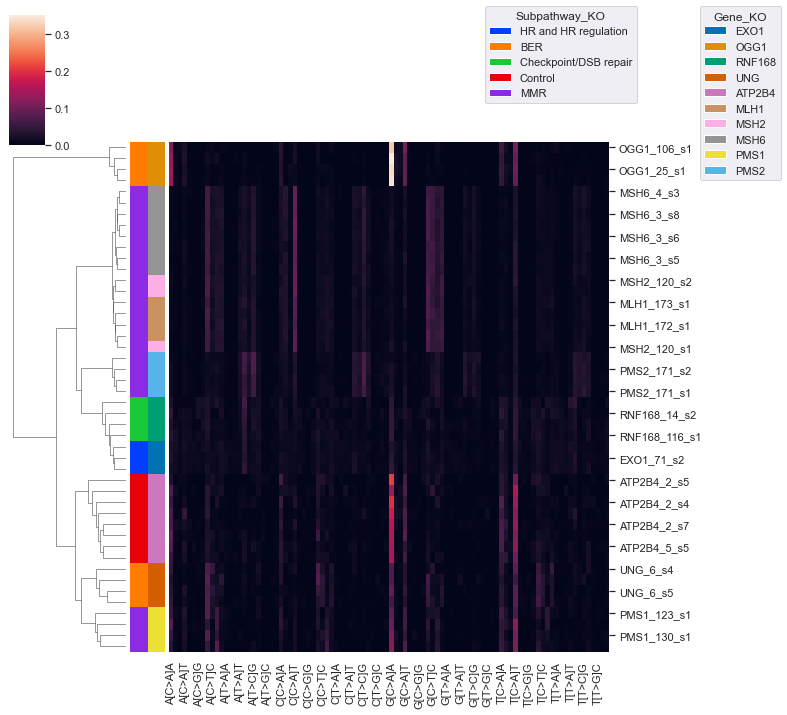

In [73]:
# CLUSTERMAP
zou = pd.read_pickle("data/zou2021/zou_96SBS_83indel.pkl")

# FILTER IN (which kept)
pw = ['Control','MMR']
# gen = []
gen = ['EXO1', 'RNF168','OGG1','UNG']
#ALL:
# gen = set(zou.loc[:, ['Gene_KO']].values.flatten())

zou_filtered_in = filter_in(zou, pw, gen)
# zou_filtered_in = zou

print(zou_filtered_in.shape)

features = zou_filtered_in.columns[0:96]
# features = indel_feat()
# features = [*SBS_feat(), *indel_feat()]

pathways = zou_filtered_in.pop("Subpathway_KO")
lut = dict(zip(pathways.unique(), sns.color_palette("bright", len(pathways.unique())) ))
color_path = pathways.map(lut)

gene = zou_filtered_in.pop("Gene_KO")
lut2 = dict(zip(gene.unique(), sns.color_palette("colorblind", len(gene.unique())) ))
color_gene = gene.map(lut2)


sns.clustermap(zou_filtered_in.loc[:,features],
               row_cluster= True,
               col_cluster = False,
               row_colors = [color_path, color_gene],
              )

handles = [Patch(facecolor=lut[name]) for name in lut]
leg1 = plt.legend(handles, lut, title='Subpathway_KO',
           bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

handles2 = [Patch(facecolor=lut2[name]) for name in lut2]
leg2 = plt.legend(handles2, lut2, title='Gene_KO',
           bbox_to_anchor=(1.1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.gca().add_artist(leg1)

plt.show()

(83, 18)


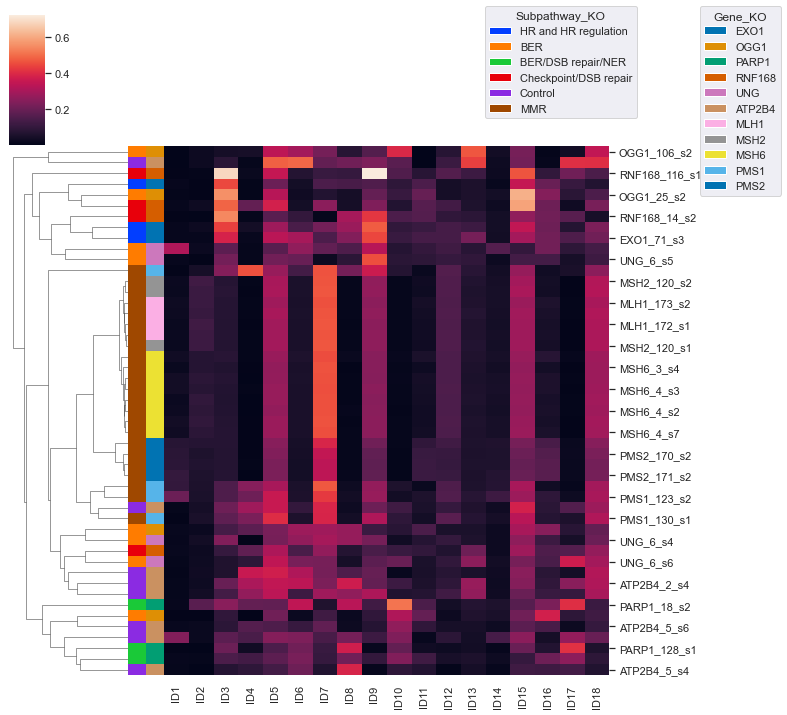

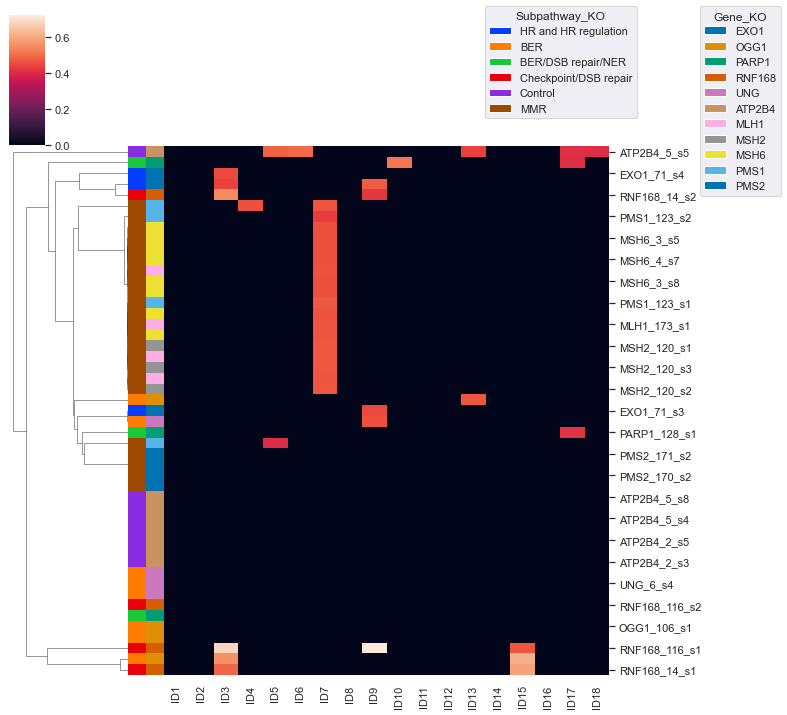

'\n\n'

In [52]:
def cossim(A, B):
    '''return cosine similarity between 2 vectors'''
    return np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

cosmic_temp = pd.read_csv('C:/Users/sande/PycharmProjects/MEP_data/data/COSMIC_v3.2_ID_GRCh37.txt', delimiter='\t', index_col= 'Type')
cosmic = cosmic_temp.values

print(cosmic.shape)
n_ID = cosmic.shape[1]

# FILTER IN (which kept)
pw = ['Control','MMR']
# gen = []
gen = ['EXO1', 'RNF168','OGG1','UNG','PARP1']
#ALL:
# gen = set(zou.loc[:, ['Gene_KO']].values.flatten())

zou_filtered_in = filter_in(zou, pw, gen)
# zou_filtered_in = zou

n_samp, n_feat = zou_filtered_in.shape

# features = zou.columns[0:96]
features = indel_feat()

data = zou_filtered_in.loc[:,features].values
     
genes = zou_filtered_in.index.values
SBS = cosmic_temp.columns.values

similarity = np.zeros((n_samp, n_ID))
similarity_2 = np.zeros((n_samp, n_ID))

for i in range(n_samp):
    for j in range(n_ID):
#         similarity[i,j] = cossim(data[i,:], data[j,:])
        similarity[i,j] = cossim(data[i,:], cosmic[:,j])
        if similarity[i,j] > 0.4:
            similarity_2[i,j] = similarity[i,j]
        
    
# sns.clustermap(zou_filtered_in.loc[:,features],
#                row_cluster= True,
#                col_cluster = False,
#                row_colors = [color_path, color_gene],
#                cbar_pos = (0, 0.1, .03, .2)
#               )
    
pathways = zou_filtered_in.pop("Subpathway_KO")
lut = dict(zip(pathways.unique(), sns.color_palette("bright", len(pathways.unique())) ))
color_path = pathways.map(lut)

gene = zou_filtered_in.pop("Gene_KO")
lut2 = dict(zip(gene.unique(), sns.color_palette("colorblind", len(gene.unique())) ))
color_gene = gene.map(lut2)
    
# Similarity to COSMIC    
sims = pd.DataFrame(data=similarity, index = genes, columns= SBS)
sns.clustermap(sims,
               row_cluster= True,
               col_cluster = False,
              row_colors = [color_path, color_gene])

handles = [Patch(facecolor=lut[name]) for name in lut]
leg1 = plt.legend(handles, lut, title='Subpathway_KO',
           bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

handles2 = [Patch(facecolor=lut2[name]) for name in lut2]
leg2 = plt.legend(handles2, lut2, title='Gene_KO',
           bbox_to_anchor=(1.1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.gca().add_artist(leg1)
plt.show()



# FILTERED (Treshold)
sims_2 = pd.DataFrame(data=similarity_2, index = genes, columns= SBS)
sns.clustermap(sims_2,
               row_cluster= True,
               col_cluster = False,
              row_colors = [color_path, color_gene]
              )
handles = [Patch(facecolor=lut[name]) for name in lut]
leg1 = plt.legend(handles, lut, title='Subpathway_KO',
           bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

handles2 = [Patch(facecolor=lut2[name]) for name in lut2]
leg2 = plt.legend(handles2, lut2, title='Gene_KO',
           bbox_to_anchor=(1.1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.gca().add_artist(leg1)
plt.show()
# print(sims_2)

'''

'''
# sns.heatmap(similarity, xticklabels = SBS, yticklabels= genes)        
        

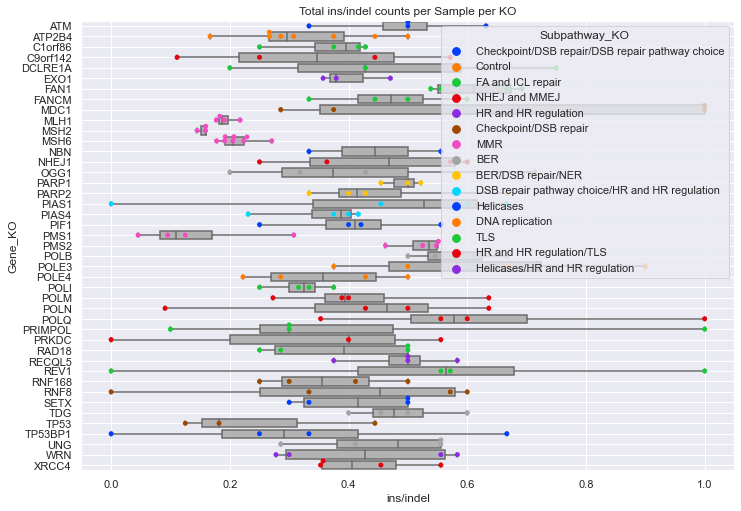

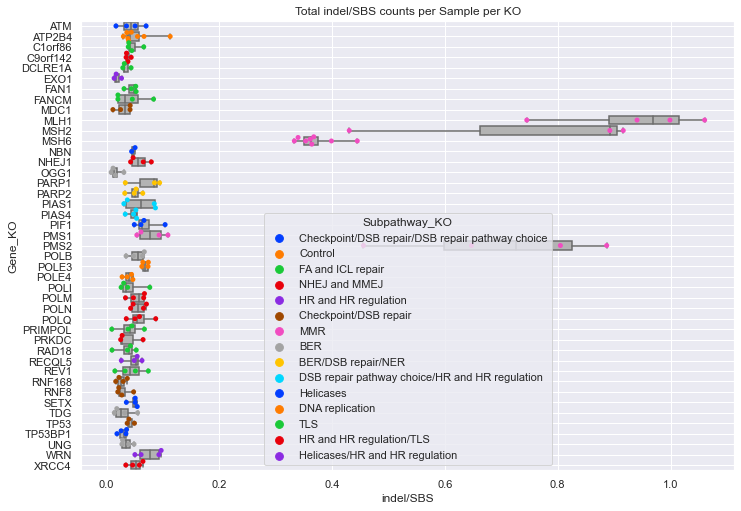

In [80]:
# INDELS filtered out MMR
zou = pd.read_pickle("data/zou2021/zou_96SBS_83indel.pkl")

pw = []
gen = []

zou_filtered_out = filter_out(zou, pw, gen)

# count_perKO(zou, 'Count')
count_perKO(zou_filtered_out, 'ins/indel')
count_perKO(zou_filtered_out, 'indel/SBS')

# count_perKO(zou, 'DBS_count')

In [96]:
zou = pd.read_pickle("data/zou2021/zou_SBS_indel_DBS.pkl")

# FILTER IN (which kept)
pw = ['Control','MMR']
# gen = []
gen = ['EXO1', 'RNF168','OGG1','UNG']
#ALL:
# gen = set(zou.loc[:, ['Gene_KO']].values.flatten())

zou = filter_in(zou, pw, gen)
# zou_filtered_in = zou


feat = zou.columns
zou = zou[feat[:100]]
zou.to_pickle("data/zou2021/zou_96SBS_filtered.pkl")
zou



,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,...,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,Gene_KO,Count,Protein_KO,Subpathway_KO
EXO1_71_s2,0.028554,0.013366,0.006683,0.013973,0.009721,0.008505,0.009113,0.006075,0.012151,0.011543,...,0.010936,0.010936,0.007898,0.003038,0.007290,0.007898,EXO1,1646,Exonuclease 1,HR and HR regulation
EXO1_71_s3,0.023744,0.017352,0.008219,0.019178,0.009132,0.013699,0.006393,0.012785,0.017352,0.006393,...,0.008219,0.008219,0.005479,0.001826,0.003653,0.012785,EXO1,1095,Exonuclease 1,HR and HR regulation
EXO1_71_s4,0.016562,0.014984,0.004732,0.014196,0.010252,0.005521,0.007098,0.006309,0.019716,0.010252,...,0.007098,0.020505,0.003155,0.003943,0.004732,0.007098,EXO1,1268,Exonuclease 1,HR and HR regulation
OGG1_106_s1,0.115299,0.004435,0.008869,0.022173,0.000000,0.000000,0.000000,0.000000,0.006652,0.006652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002217,OGG1,451,8-Oxoguanine glycosylase,BER
OGG1_106_s2,0.131336,0.009217,0.004608,0.027650,0.002304,0.000000,0.002304,0.002304,0.013825,0.006912,...,0.004608,0.000000,0.000000,0.000000,0.000000,0.002304,OGG1,434,8-Oxoguanine glycosylase,BER
OGG1_25_s1,0.136490,0.006964,0.001393,0.018106,0.001393,0.000000,0.000000,0.000000,0.009749,0.001393,...,0.002786,0.002786,0.002786,0.000000,0.001393,0.001393,OGG1,718,8-Oxoguanine glycosylase,BER
OGG1_25_s2,0.133949,0.008083,0.002309,0.025404,0.003464,0.002309,0.000000,0.003464,0.008083,0.002309,...,0.002309,0.005774,0.002309,0.000000,0.002309,0.004619,OGG1,866,8-Oxoguanine glycosylase,BER
RNF168_116_s1,0.035183,0.018945,0.006766,0.013532,0.013532,0.006766,0.012179,0.009472,0.024357,0.005413,...,0.002706,0.020298,0.002706,0.005413,0.008119,0.014885,RNF168,739,Ring finger protein 168,Checkpoint/DSB repair
RNF168_116_s2,0.027097,0.010323,0.005161,0.012903,0.009032,0.001290,0.003871,0.018065,0.028387,0.009032,...,0.009032,0.020645,0.003871,0.005161,0.003871,0.012903,RNF168,775,Ring finger protein 168,Checkpoint/DSB repair
RNF168_14_s1,0.025735,0.003676,0.003676,0.003676,0.003676,0.003676,0.018382,0.018382,0.025735,0.014706,...,0.000000,0.007353,0.003676,0.000000,0.000000,0.014706,RNF168,272,Ring finger protein 168,Checkpoint/DSB repair


In [100]:
zou['Gene_KO'].unique()

array(['EXO1', 'OGG1', 'RNF168', 'UNG', 'ATP2B4', 'MLH1', 'MSH2', 'MSH6',
       'PMS1', 'PMS2'], dtype=object)

In [122]:
zou = pd.read_pickle("data/zou2021/zou_SBS_indel_DBS.pkl")

# FILTER IN (which kept)
pw = ['Control','MMR']
# gen = []
gen = ['EXO1', 'RNF168','OGG1','UNG']
#ALL:
# gen = set(zou.loc[:, ['Gene_KO']].values.flatten())

zou = filter_in(zou, pw, gen)
# zou_filtered_in = zou


feat = zou.columns
zou = zou[feat[:100]]
zou.to_pickle("data/zou2021/zou_96SBS_filtered.pkl")

idx = zou['Gene_KO'].unique()

zou_u = zou.groupby(['Gene_KO', 'Protein_KO','Subpathway_KO']).mean().reset_index()
zou_u = zou_u.set_index('Gene_KO')

zou_SD = zou.groupby(['Gene_KO', 'Protein_KO','Subpathway_KO']).std().reset_index()
zou_SD = zou_SD.set_index('Gene_KO')

zou_u.to_pickle("data/zou2021/zou_96SBS_filtered_mean.pkl")
zou_SD.to_pickle("data/zou2021/zou_96SBS_filtered_SD.pkl")



# EDA volkova

In [55]:
volkova_df1 = pd.read_pickle('volkova.pkl')
volkova_df2 = pd.read_pickle('volkova2.pkl')
df = pd.merge(volkova_df1, volkova_df2, on="Sample")
df['Mutagen'] = df['Mutagen'].fillna(0)

features = list(df.columns)
y = df.loc[:, ['Mutagen','Genotype']]
mutagen = set(df.loc[:, ['Mutagen']].values.flatten())
mutagen.remove(0)

temp = df.loc[:, features[1:97]].div(df.loc[:,features[1:97]].sum(axis=1), axis=0)  # Separating out the target
temp = pd.concat([temp, y],axis=1)
temp.dropna(subset=features[1:97], inplace=True)
temp = temp[~temp['Mutagen'].isin(mutagen)]

#PATHWAY
xls = pd.ExcelFile('data/volkova2021/KO_pathway.xlsx')
pathways = pd.read_excel(xls, 'Blad1', header=0)
temp = pd.merge(temp, pathways, on='Genotype')



In [57]:
# [ DATASET ; LABELED ; FILTER ; COMPARE to ]
title = ['volkova','pathway','untreated','MMR']

volkova_df1 = pd.read_pickle('volkova.pkl')
volkova_df2 = pd.read_pickle('volkova2.pkl')
df = pd.merge(volkova_df1, volkova_df2, on="Sample")
print(df)
df['Mutagen'] = df['Mutagen'].fillna(0)

features = list(df.columns)
df['Count'] = df.loc[:,features[1:97]].sum(axis=1)
y = df.loc[:, ['Mutagen','Genotype','Generation']]

# # Filter Gene (IF specific gene in pathway
# gene = set(df.loc[:, ['Genotype']].values.flatten())
# gene.difference_update(['N2','brc-1','rip-1','rfs-1'])
#
# # Filter Generation
# generation = set(df.loc[:, ['Generation']].values.flatten())
# generation.difference_update([20,40])
#
# # Filter Mutagen -> only untreated
mutagen = set(df.loc[:, ['Mutagen']].values.flatten())
mutagen.remove(0)

temp = df.loc[:, features[1:97]].div(df.loc[:,features[1:97]].sum(axis=1), axis=0)
temp = pd.concat([temp, y],axis=1)
temp.dropna(subset=features[1:97], inplace=True)
temp = temp[~temp['Mutagen'].isin(mutagen)]
# temp = temp[~temp['Genotype'].isin(gene)]
# temp = temp[~temp['Generation'].isin(generation)]

#PATHWAY
xls = pd.ExcelFile('data/volkova2021/KO_pathway.xlsx')
pathways = pd.read_excel(xls, 'Blad1', header=0)
temp = pd.merge(temp, pathways, on='Genotype')
pathway = set(temp.loc[:, ['Pathway']].values.flatten())
pathway.difference_update(['Control','MMR'])
temp = temp[~temp['Pathway'].isin(pathway)]

print(temp)
x = temp.loc[:,temp.columns[0:96]].values
y = temp.loc[:, 'Pathway']
y = y.reset_index(drop=True)
x = StandardScaler().fit_transform(x)

       Sample  A[C>A]A  A[C>A]C  A[C>A]G  A[C>A]T  C[C>A]A  C[C>A]C  C[C>A]G  \
0     CD0001a        0        0        0        0        0        0        0   
1     CD0001c        0        0        0        0        0        0        0   
2     CD0001d        0        0        1        0        1        0        0   
3     CD0002a        0        0        0        0        0        0        0   
4     CD0002b        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2712  CD1080b        0        0        0        0        0        0        0   
2713  CD1081b        0        0        0        0        0        0        0   
2714  CD1082b        0        0        0        0        0        0        0   
2715  CD1083b        0        0        0        0        0        0        0   
2716  CD1084b        0        0        0        0        0        0        0   

      C[C>A]T  G[C>A]A  ...      Type  